In [96]:
import pandas as pd
import dateutil
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [97]:
df = pd.read_csv('Created CSVs/all_seins_all_data_standard_dates.csv').drop('Unnamed: 0', axis=1)

In [98]:
df = df[['Date', '# Hauls', 'Common Name', 'Quantity']]

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 897 entries, 0 to 896
Data columns (total 4 columns):
Date           897 non-null object
# Hauls        297 non-null object
Common Name    897 non-null object
Quantity       731 non-null object
dtypes: object(4)
memory usage: 28.1+ KB


In [100]:
df = df.dropna()

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 590 to 896
Data columns (total 4 columns):
Date           293 non-null object
# Hauls        293 non-null object
Common Name    293 non-null object
Quantity       293 non-null object
dtypes: object(4)
memory usage: 11.4+ KB


In [102]:
df['Date'] =  [dateutil.parser.parse(date) for date in list(df['Date'])]

In [103]:
set(df[df["# Hauls"].str.contains(r'\d') == False]['# Hauls'])

{'?', 'Many', 'unknown'}

In [104]:
df = df[df["# Hauls"].str.contains(r'\d') == True]

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 590 to 896
Data columns (total 4 columns):
Date           182 non-null datetime64[ns]
# Hauls        182 non-null object
Common Name    182 non-null object
Quantity       182 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 7.1+ KB


In [106]:
import re
hauls = []
for haul in df['# Hauls']:
    first_num  = re.search(r'\d+', haul).group()
    hauls.append(first_num)

In [107]:
df['# Hauls'] = [int(x) for x in hauls]

In [108]:
df = df.replace(to_replace=['TMTC','Too Many To Count'], value= '30')

In [109]:
df = df.replace(to_replace="unknown", value= np.nan).dropna()

In [110]:
quants = []
for quant in df['Quantity']:
    first_num  = re.search(r'\d+', quant).group()
    quants.append(first_num)

In [111]:
df['Quantity'] = [int(x) for x in quants]

In [112]:
df['Common Name'] = [str(x) for x in df['Common Name']]

In [113]:
hauls = list(df.groupby(['Date', '# Hauls']).sum().index.get_level_values(1))

In [114]:
dates = list(df.groupby(['Date', '# Hauls']).sum().index.get_level_values(0))

In [115]:
hauls_df = df.groupby(['Date', '# Hauls'], as_index=False).sum()

In [116]:
hauls_data = hauls_df[['# Hauls', 'Quantity']]

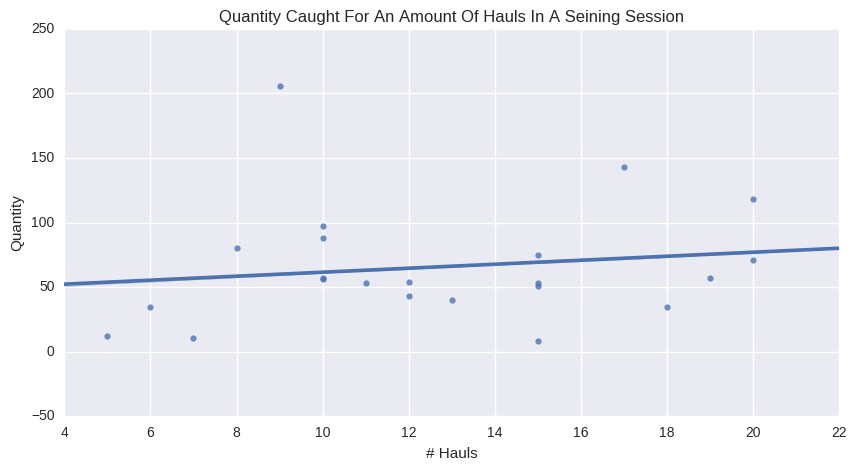

In [117]:
ax = sns.regplot(x="# Hauls", y="Quantity", ci = False,data=hauls_df)
ax.set_title('Quantity Caught For An Amount Of Hauls In A Seining Session')
ax.figure.set_figheight(5)
ax.figure.set_figwidth(10)
ax.figure.savefig("Graphs/Quantity Caught For An Amount Of Hauls In A Seining Session")

In [119]:
# ditch comb jellies

In [120]:
df['Common Name'] = [x.lower() for x in list(df['Common Name'])]

In [121]:
name_changes = {'ctenophore':'comb jelly','comb jellies ctenophores': 'comb jelly', 'comb jellies': 'comb jelly', '20 ctenophores': 'comb jelly'}

In [122]:
df = df.replace(name_changes)

In [123]:
df_no_jellies = df[df['Common Name'] != 'comb jelly']

In [124]:
hauls_df = df_no_jellies.groupby(['Date', '# Hauls'], as_index=False).sum()

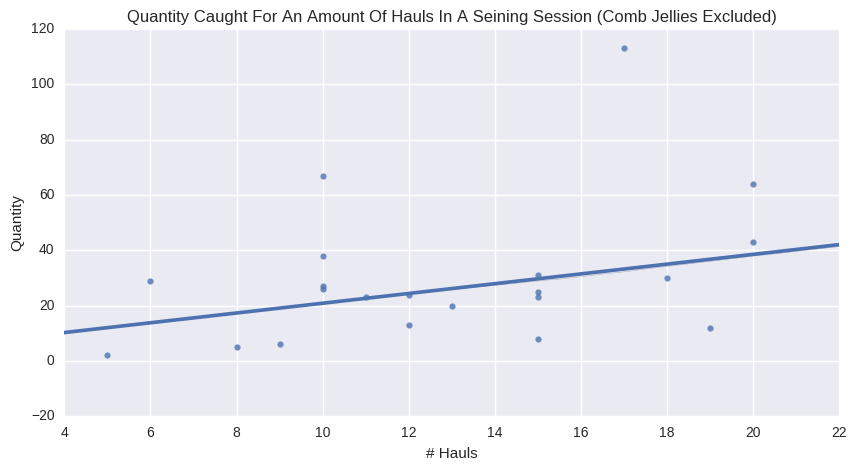

In [125]:
ax = sns.regplot(x="# Hauls", y="Quantity", data=hauls_df, order = 1, ci = False, robust = True)
ax.set_title('Quantity Caught For An Amount Of Hauls In A Seining Session (Comb Jellies Excluded)')
ax.figure.set_figheight(5)
ax.figure.set_figwidth(10)
ax.figure.savefig("Graphs/Quantity Caught For An Amount Of Hauls In A Seining Session (Comb Jellies Excluded)")

In [126]:
# number of species caught

In [127]:
#df

In [128]:
name_corrected_df = pd.read_csv('Created CSVs/Name_Corrected_All_Seins.csv')

In [129]:
name_corrected_df['Date'] =  [dateutil.parser.parse(date) for date in list(name_corrected_df['Date'])]

In [130]:
dates = list(set(df['Date']))

In [131]:
species_count_dict = {}
for date in dates:
    species_count_dict[date] = df[df["Date"] == date].shape[0]

In [132]:
df["Species_Count"] = [species_count_dict[x] for x in df['Date']]

In [133]:
hauls_species_df = df.groupby(['Date', '# Hauls', 'Species_Count'], as_index=False).sum()

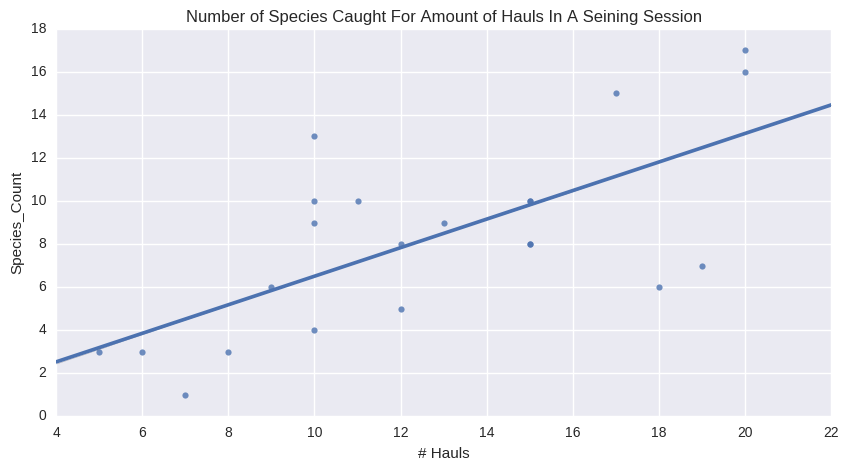

In [137]:
ax = sns.regplot(x="# Hauls", y="Species_Count", data=hauls_species_df, ci = False, order = 1)
ax.set_title("Number of Species Caught For Amount of Hauls In A Seining Session")
ax.figure.set_figheight(5)
ax.figure.set_figwidth(10)
ax.figure.savefig("Graphs/Number of Species Caught For Amount of Hauls In A Seining Session")

In [135]:
# Every 6 seins leads to 4 new species

In [136]:
# 2 fish per haul, 2 new species per 3 hauls